<a href="https://colab.research.google.com/github/nishant-harinkhede12/Python-Codes-and-NLP/blob/NLP/CONFUSION%20MATRIX_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = 'https://raw.githubusercontent.com/nishant-harinkhede12/Python-Codes-and-NLP/NLP/fake_news.csv'
import pandas as pd
df = pd.read_csv(url)
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
4995,5709,The Arcturian Group by Marilyn Raffaele Octobe...,stevew,,1
4996,5710,Comment on Rachel Maddow declares that a Trump...,Anonymous,"Posted on November 6, 2016 by DCG | 19 Comment...",1
4997,5713,HILLARY CLINTON is being funded by the same Mu...,BareNakedIslam,"November 4, 2016 @ 4:48 pm \nNow why am I not ...",1
4998,5714,Предикторские свойства толпы?,Евстахий Стахович,Паранормальное \nПрофессор американского униве...,1


In [ ]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
messages=df.copy()

In [ ]:
messages['title'][0:3]

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
Name: title, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
import re 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
wordnet=WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    # review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[0:3]

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired']

# Word2Vec

In [ ]:

from gensim.models import Word2Vec
X = Word2Vec(corpus, min_count=2)
#if the word is present < then 1 then use to skip the  conunt and as my data is very small 
#word2vec is applied for huge amount of data

# import numpy as np
# X =  np.array(X)

## Applying Countvectorizer Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
tf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tf.fit_transform(corpus).toarray()

In [ ]:
X.shape

(5000, 5000)

In [ ]:
y=messages['label']

## Divide the dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
tf.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'ab',
 'abandon',
 'abandon new',
 'abandon new york',
 'abandoned',
 'abc',
 'abc news',
 'abduction',
 'abduction ring',
 'abduction ring exposed',
 'abe',
 'abedin',
 'abortion',
 'abruptly',
 'absolutely',
 'absurd',
 'abuse',
 'abuse power',
 'abusing']

In [ ]:
count_df = pd.DataFrame(X_train, columns=tf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# CONFUSION MATRIX

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.829


Confusion matrix, without normalization


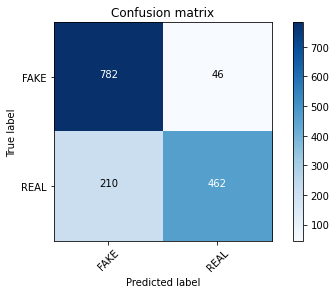

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# PassiveAggressiveClassifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.910


Confusion matrix, without normalization


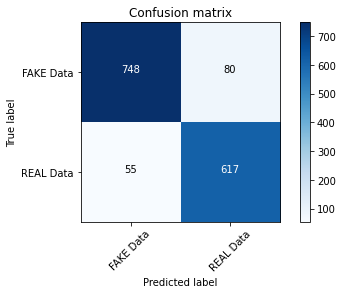

In [ ]:

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

# Multinomial Classifier with Hyperparameter

In [ ]:
classifier=MultinomialNB(alpha=0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha: 0.0, Score : 0.788
Alpha: 0.1, Score : 0.8333333333333334
Alpha: 0.2, Score : 0.84
Alpha: 0.30000000000000004, Score : 0.8373333333333334
Alpha: 0.4, Score : 0.8346666666666667
Alpha: 0.5, Score : 0.836
Alpha: 0.6000000000000001, Score : 0.8333333333333334
Alpha: 0.7000000000000001, Score : 0.8333333333333334
Alpha: 0.8, Score : 0.832
Alpha: 0.9, Score : 0.832


##############################################################################################################